# 🛳️ Titanic - ML from Disaster

## **1. Loading data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv('../data/train.csv',index_col='PassengerId')
test_df = pd.read_csv('../data/test.csv',index_col='PassengerId')

In [3]:
train_df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
test_df.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

In [5]:
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


## **2. Feature Classification**

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


* Categorical: `Survied`,`Pclass`,`Sex`,`SibSp`,`Parch`,`Embarked`

In [8]:
train_df['Survived'] = train_df['Survived'].astype('category')
categorical = ['Pclass','Sex','SibSp','Parch','Embarked']
for col in categorical:
    train_df[col] = train_df[col].astype('category')
    test_df[col] = test_df[col].astype('category')
train_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 48.2+ KB


In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Pclass    418 non-null    category
 1   Name      418 non-null    object  
 2   Sex       418 non-null    category
 3   Age       332 non-null    float64 
 4   SibSp     418 non-null    category
 5   Parch     418 non-null    category
 6   Ticket    418 non-null    object  
 7   Fare      417 non-null    float64 
 8   Cabin     91 non-null     object  
 9   Embarked  418 non-null    category
dtypes: category(5), float64(2), object(3)
memory usage: 22.7+ KB


In [10]:
train_df.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [11]:
train_df.describe(include=['category'])

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


## **3. Exploratory Data Analysis (EDA)**

In [12]:
train_df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [13]:
train_df['Survived'].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

In [14]:
train_df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [15]:
train_df['Sex'].value_counts(normalize=True)

Sex
male      0.647587
female    0.352413
Name: proportion, dtype: float64

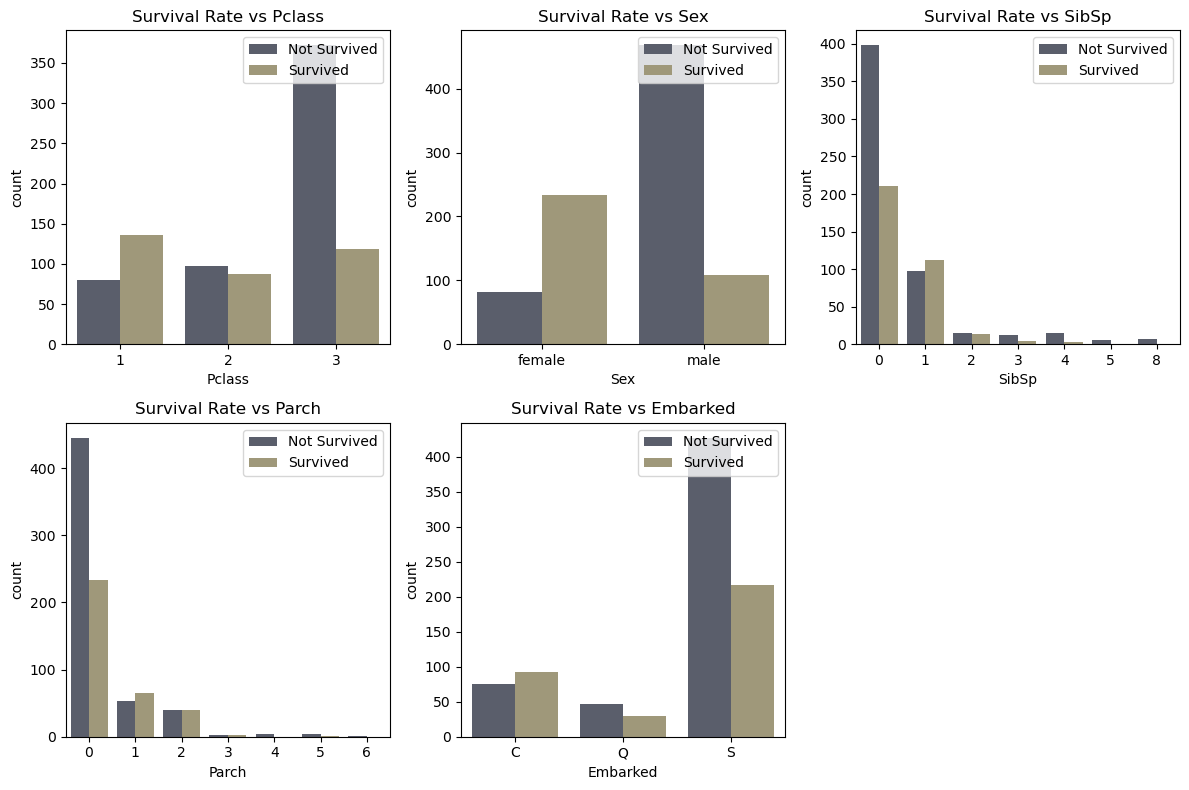

In [16]:
fig, ax = plt.subplots(nrows = 2, ncols= 3,figsize=(12,8))
sns.countplot(data=train_df,x='Pclass',hue='Survived',palette='cividis',ax=ax[0,0])
sns.countplot(data=train_df,x='Sex',hue='Survived',palette='cividis',ax=ax[0,1])
sns.countplot(data=train_df,x='SibSp',hue='Survived',palette='cividis',ax=ax[0,2])
sns.countplot(data=train_df,x='Parch',hue='Survived',palette='cividis',ax=ax[1,0])
sns.countplot(data=train_df,x='Embarked',hue='Survived',palette='cividis',ax=ax[1,1])
for r in range(0,2):
    for c in range(0,3):
        index = 3*r+c
        if(index<5):
            ax[r,c].set_title(f'Survival Rate vs {categorical[index]}')
            ax[r,c].legend(labels=['Not Survived','Survived'],loc='upper right')
ax.flat[-1].set_visible(False)
plt.tight_layout()
plt.show()

* Numerical: `Age`, `Fare`

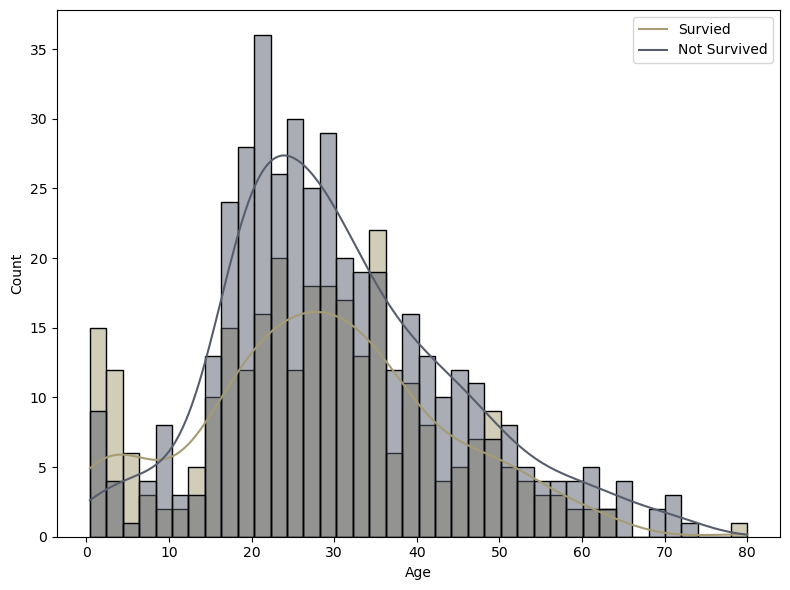

In [17]:
fig , ax = plt.subplots(figsize = (8,6))
sns.histplot(train_df,x='Age',bins=40,hue='Survived',kde=True,palette='cividis')
ax.legend(['Survied','Not Survived'],loc='upper right')
plt.tight_layout()
plt.show()

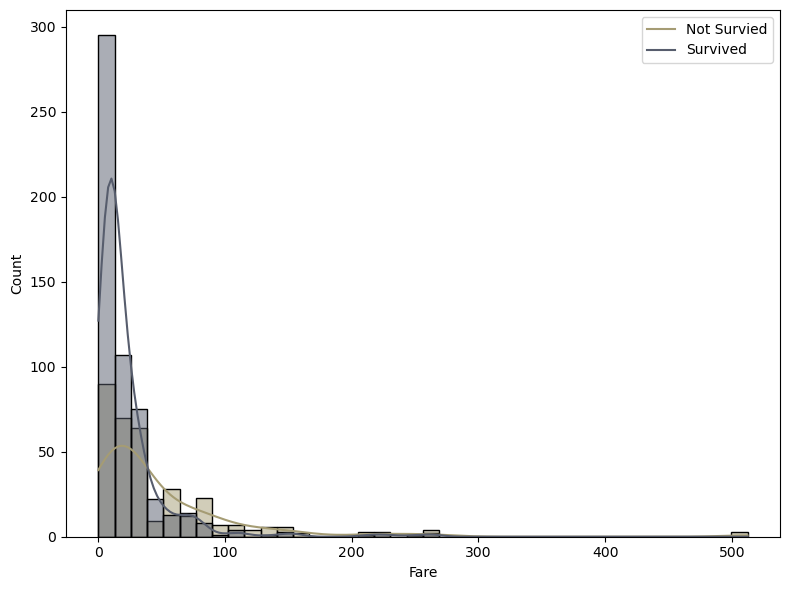

In [18]:
fig , ax = plt.subplots(figsize = (8,6))
sns.histplot(train_df,x='Fare',bins=40,hue='Survived',kde=True,legend=True,palette='cividis')
ax.legend(['Not Survied','Survived'],loc='upper right')
plt.tight_layout()
plt.show()

In [19]:
train_df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

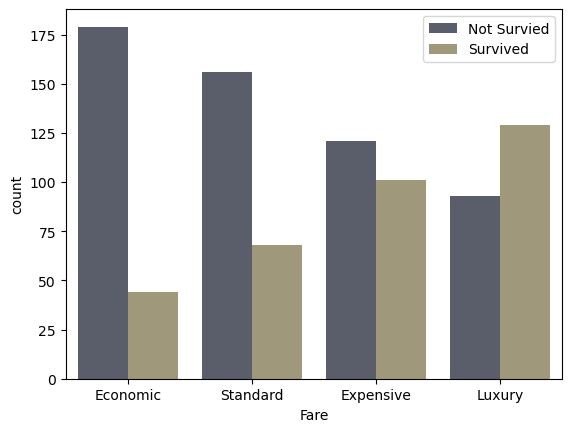

In [20]:
fare_categories=['Economic','Standard','Expensive','Luxury']
quartile_data = pd.qcut(train_df['Fare'],4,fare_categories)
sns.countplot(train_df,x=quartile_data,hue='Survived',palette='cividis')
plt.legend(['Not Survied','Survived']);

## **4. Feature Engineering**

* Other Types: `Name`

In [21]:
train_df['Name']

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [22]:
import re

def extract_title(name):
    p = re.compile(r",([\w\s]+)\.")
    return p.search(name).groups(1)[0].strip()

train_df['Title'] = train_df['Name'].apply(lambda name: extract_title(name))
train_df['Title'].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Ms                1
Mme               1
Don               1
Lady              1
Sir               1
Capt              1
the Countess      1
Jonkheer          1
Name: count, dtype: int64

In [23]:
test_df['Title'] = test_df['Name'].apply(lambda name : extract_title(name))
test_df['Title'].value_counts()

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

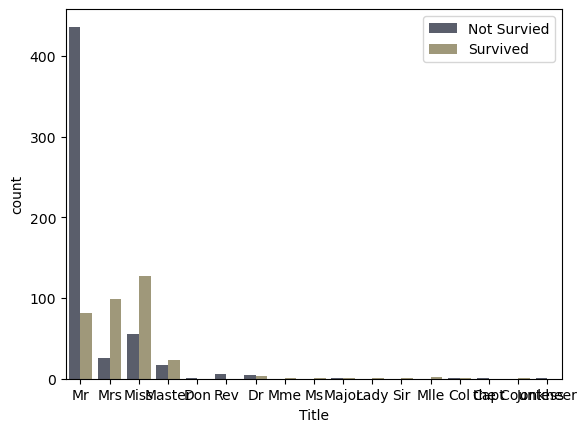

In [24]:
sns.countplot(train_df,x='Title',hue='Survived',palette='cividis')
plt.legend(['Not Survied','Survived']);

In [25]:
def group_title (title):
    if title in ['Mr','Mrs','Miss','Master'] : return title
    elif title == 'Ms': return 'Miss'
    else: return 'Others'
train_df['Title'] = train_df['Title'].apply(lambda title : group_title(title))
train_df['Title'].value_counts()

Title
Mr        517
Miss      183
Mrs       125
Master     40
Others     26
Name: count, dtype: int64

In [26]:
test_df['Title'] = test_df['Title'].apply(lambda title : group_title(title))
test_df['Title'].value_counts()

Title
Mr        240
Miss       79
Mrs        72
Master     21
Others      6
Name: count, dtype: int64

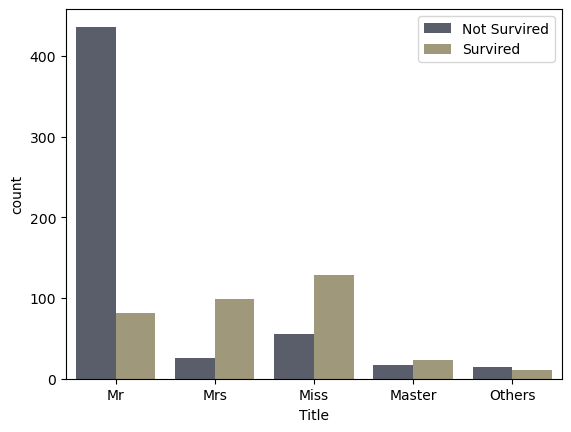

In [27]:
sns.countplot(train_df,x='Title',hue='Survived',palette='cividis')
plt.legend(['Not Survired','Survired'])

* Compile `SibSp`, `Parch` -> `Family_Size`

In [28]:
train_df['Family_Size'] = train_df['SibSp'].astype('int') + train_df['Parch'].astype('int') + 1
train_df['Family_Size']

PassengerId
1      2
2      2
3      1
4      2
5      1
      ..
887    1
888    1
889    4
890    1
891    1
Name: Family_Size, Length: 891, dtype: int64

In [29]:
test_df['Family_Size'] = test_df['SibSp'].astype('int') + test_df['Parch'].astype('int') + 1
test_df['Family_Size']

PassengerId
892     1
893     2
894     1
895     1
896     3
       ..
1305    1
1306    1
1307    1
1308    1
1309    3
Name: Family_Size, Length: 418, dtype: int64

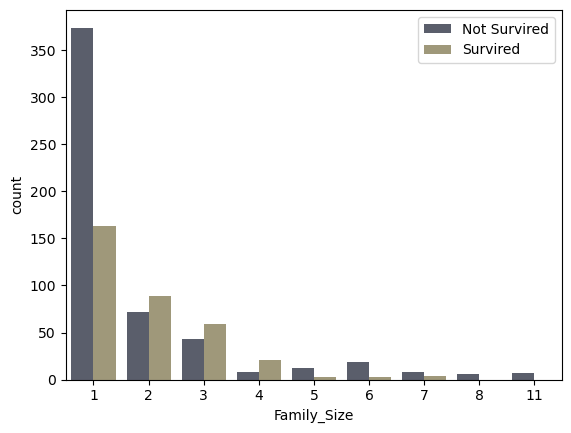

In [30]:
sns.countplot(train_df,x='Family_Size',hue='Survived',palette='cividis')
plt.legend(['Not Survired','Survired'])

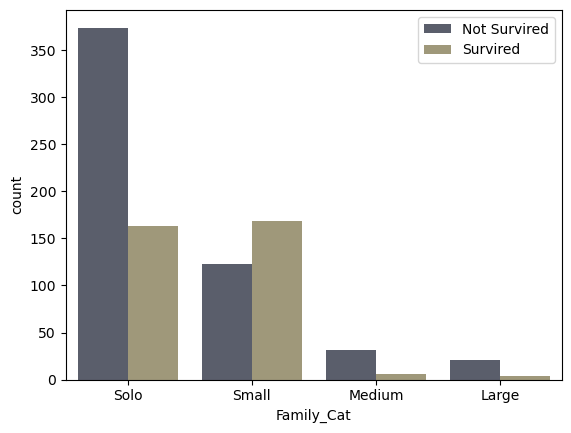

In [31]:
train_df['Family_Cat'] = pd.cut(train_df['Family_Size'],bins=[0,1,4,6,20],labels=['Solo','Small','Medium','Large'])
test_df['Family_Cat'] = pd.cut(test_df['Family_Size'],bins=[0,1,4,6,20],labels=['Solo','Small','Medium','Large'])
sns.countplot(train_df,x='Family_Cat',hue='Survived',palette='cividis')
plt.legend(['Not Survired','Survired']);

## **5. Data Wrangling**

In [32]:
num_features = ['Age','Fare']
cat_features = ['Sex','Pclass','Embarked','Title','Family_Cat']
feature_cols = num_features + cat_features
feature_cols

['Age', 'Fare', 'Sex', 'Pclass', 'Embarked', 'Title', 'Family_Cat']

In [33]:
def display_missing(df,feature_cols):
    n_rows = df.shape[0]
    for col in feature_cols:
        missing_count = df[col].isnull().sum()
        if missing_count : print(f'Column {col} has {missing_count*100/n_rows: .2f}% missing values')
print('train_df')
display_missing(train_df,feature_cols)
print('\ntest_df')
display_missing(test_df,feature_cols)

train_df
Column Age has  19.87% missing values
Column Embarked has  0.22% missing values

test_df
Column Age has  20.57% missing values
Column Fare has  0.24% missing values


### Filling missing values
**Age**
* Fill with `median`

In [34]:
train_df['Age'] = pd.to_numeric(train_df['Age'], errors='coerce')
age_by_sex_pclass = train_df.groupby(['Sex','Pclass'],observed=True)['Age'].median()
age_by_sex_pclass

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [35]:
train_df['Age'] = train_df['Age'].fillna(train_df.groupby(['Sex', 'Pclass'],observed=True)['Age'].transform('median'))
test_df['Age'] = test_df['Age'].fillna(test_df.groupby(['Sex', 'Pclass'],observed=True)['Age'].transform('median'))
print('train_df')
display_missing(train_df,feature_cols)
print('\ntest_df')
display_missing(test_df,feature_cols)


train_df
Column Embarked has  0.22% missing values

test_df
Column Fare has  0.24% missing values


In [36]:
X = train_df[feature_cols]
Y = train_df['Survived']

In [37]:
X_test = test_df[feature_cols]

In [38]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


num_tranformer = Pipeline(steps=[('imputer',SimpleImputer(strategy='median')),('scaler',StandardScaler())])

cat_tranformer = Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent')),('encoder',OneHotEncoder(handle_unknown='ignore'))])

In [39]:
preprocessor = ColumnTransformer(transformers=[('num',num_tranformer,num_features),('cat',cat_tranformer,cat_features)])

In [40]:
preprocessor.fit(X)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'Pclass', 'Embarked', 'Title',
                                  'Family_Cat'])])

In [41]:
X = preprocessor.transform(X)   

In [42]:
X_test = preprocessor.transform(X_test)

## **6. Model Training**

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_val, Y_train , Y_val = train_test_split(X,Y,test_size=0.2)

In [45]:
X_train.shape, X_val.shape

((712, 19), (179, 19))

In [46]:
X_test.shape

(418, 19)

In [47]:
# binary classification

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix

In [48]:
log_reg = LogisticRegression(solver='liblinear',max_iter=1000)
log_reg.fit(X_train,Y_train)


LogisticRegression(max_iter=1000, solver='liblinear')

In [49]:
log_reg.score(X_val,Y_val)

0.8324022346368715

In [50]:
Y_pred = log_reg.predict(X_val)

In [51]:
precision_score(Y_val,Y_pred), recall_score(Y_val,Y_pred)

(0.75, 0.6964285714285714)

In [52]:
print(classification_report(Y_val,Y_pred))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       123
           1       0.75      0.70      0.72        56

    accuracy                           0.83       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.83      0.83      0.83       179



In [53]:
poly = PolynomialFeatures(degree=5)
poly_features_X_train = poly.fit_transform(X_train)
poly_features_X_val = poly.transform(X_val)

In [54]:
poly_log_reg = LogisticRegression(solver='liblinear',max_iter=1000)
poly_log_reg.fit(poly_features_X_train,Y_train)


LogisticRegression(max_iter=1000, solver='liblinear')

In [55]:
poly_log_reg.score(poly_features_X_val,Y_val)

0.7988826815642458

In [56]:
# Decision Tree
decision_tree = DecisionTreeClassifier(criterion= 'entropy', max_depth= 8, random_state= 2025)
decision_tree.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=2025)

In [57]:
decision_tree.score(X_val,Y_val)

0.7988826815642458

### Cross-validation

In [58]:
from sklearn.model_selection import cross_val_score

In [59]:
log_reg_cv = LogisticRegression(solver='liblinear',max_iter=1000)
dt_cv = DecisionTreeClassifier(criterion='entropy',max_depth=8, random_state=2025)

lr_scores = cross_val_score(log_reg_cv,X,Y,scoring='accuracy',cv=5)

In [60]:
lr_scores.mean() , lr_scores.std()

(np.float64(0.826031008725127), np.float64(0.020466357172416235))

In [61]:
dt_scores = cross_val_score(dt_cv,X,Y)
dt_scores.mean(), dt_scores.std()

(np.float64(0.8013997865796247), np.float64(0.02670997154413754))

## **7. Baseline Model Comparision**

In [62]:
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

seed = 2023

models = [
    LinearSVC(random_state=seed),
    SVC(random_state=seed),
    KNeighborsClassifier(metric='minkowski',p=2),
    LogisticRegression(solver='liblinear',max_iter=12000),
    DecisionTreeClassifier(random_state=seed),
    RandomForestClassifier(random_state=seed),
    ExtraTreesClassifier(),
    AdaBoostClassifier(),
    XGBClassifier(eval_metric = 'logloss', random_state=seed)
]


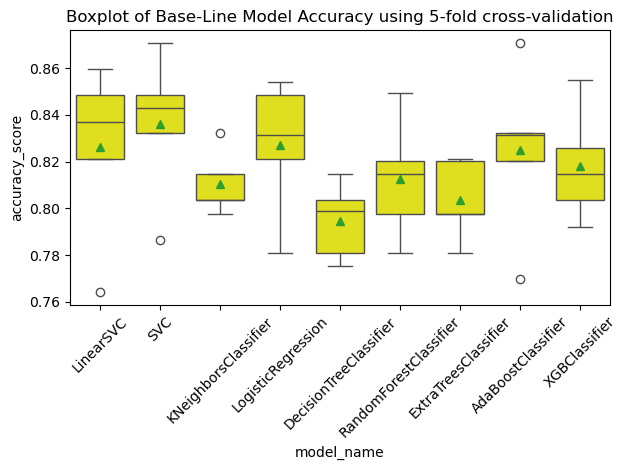

,Mean,Standard Deviation
model_name,,
SVC,0.836143,0.031097
LogisticRegression,0.827167,0.028974
LinearSVC,0.826044,0.037442
AdaBoostClassifier,0.824907,0.036325
XGBClassifier,0.818141,0.024013
RandomForestClassifier,0.812529,0.025614
KNeighborsClassifier,0.810301,0.013789
ExtraTreesClassifier,0.803572,0.017109
DecisionTreeClassifier,0.794608,0.016252


In [63]:
from sklearn.model_selection import StratifiedKFold
def generate_baseline_results(models,X,Y,metrics,cv=5,plot_result=False):
    kfold = StratifiedKFold(cv,shuffle= True, random_state=seed)
    entries = []
    for model in models:
        model_name = model.__class__.__name__
        scores = cross_val_score(model,X,Y,scoring=metrics,cv = kfold)
        for fold_idx, score in enumerate(scores):
            entries.append((model_name,fold_idx,score))
    cv_df = pd.DataFrame(entries, columns=['model_name','fold_id','accuracy_score'])

    if plot_result:
        sns.boxplot(cv_df,x='model_name',y='accuracy_score',showmeans = True,color='yellow')
        plt.title(f'Boxplot of Base-Line Model Accuracy using {cv}-fold cross-validation')
        plt.xticks(rotation = 45)
        plt.tight_layout()
        plt.show()

    mean = cv_df.groupby('model_name')['accuracy_score'].mean()
    std = cv_df.groupby('model_name')['accuracy_score'].std()

    baseline_result = pd.concat([mean,std],axis = 1 ,ignore_index=True)
    baseline_result.columns = ['Mean','Standard Deviation']

    baseline_result.sort_values(by=['Mean'],ascending=False,inplace=True)
    return baseline_result
generate_baseline_results(models,X,Y,metrics='accuracy',cv=5,plot_result=True)